In [1]:
from collections import namedtuple
import numpy as np

In [2]:
House = namedtuple ('House',['size','bedroom','price'])

In [3]:
def row_parser (row):
    splitted = row.strip().split(',')
    my_house = House ( float ( splitted[0] ), int ( splitted[1] ), float ( splitted[2] ) )
    return my_house

def reader ():
    houses = []
    with open ('ex1data2.txt', 'r') as f:
        for row in f:
            house = row_parser (row)
            houses.append (house)
    house_size = np.array ( [house.size for house in houses] )
    house_bedroom = np.array ( [house.bedroom for house in houses] )
    house_price = np.array ( [house.price for house in houses] )
    return house_size, house_bedroom, house_price

In [4]:
house_size, house_bedroom, house_price =  reader ()

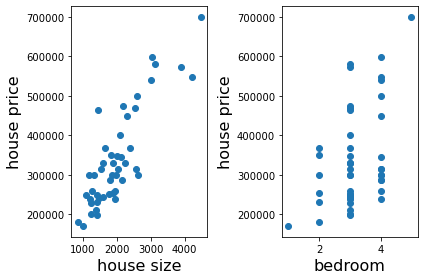

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter (house_size, house_price)
ax1.set_xlabel('house size', fontsize=16)
ax1.set_ylabel('house price', fontsize=16)
ax2.scatter (house_bedroom, house_price)
ax2.set_xlabel('bedroom', fontsize=16)
ax2.set_ylabel('house price', fontsize=16)
plt.tight_layout()

Feature Scaling

In [6]:
X = np.array ([house_size,house_bedroom])

In [7]:
def X_normalize (X, add_1 = 1):
    """
    feature is a numpy array of input data Then
    Puts X in a general format 
    Adds 1 (constant column) to the features
    You can control adding constant using add_1
    """
    #Warning: We do not scale y
    mean = np.mean (X, axis=1).reshape (2,1)
    std = np.std (X, axis=1).reshape (2,1)
    X_norm = (X - mean) / std
    X_norm = X_norm.transpose()
    if add_1 == 1 :
        one = np.ones( (X_norm.shape[0],1) )
        X_norm = np.concatenate([one,X_norm],axis = 1)
    return X_norm
X_norm = X_normalize (X)

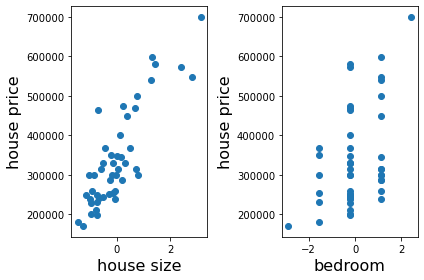

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter (X_norm [:,1], house_price)
ax1.set_xlabel('house size', fontsize=16)
ax1.set_ylabel('house price', fontsize=16)
ax2.scatter (X_norm [:,2], house_price)
ax2.set_xlabel('bedroom', fontsize=16)
ax2.set_ylabel('house price', fontsize=16)
plt.tight_layout()

In [9]:
def cost_function (X, theta, y):
#     m = len (X[0])
#     cost = 0
#     for i in range (m):
#         h_theta = h_theta_func (X, theta, i)
#         cost += 1 / ( 2 * m ) * ( h_theta - y[i] ) ** 2
    y_hat = X@theta
    squared_error = sum ( (y_hat - y) ** 2)
    cost = 1 / ( 2 * X.shape[0] ) * squared_error
    return cost


In [18]:
Y = np.array (house_price)
Y = Y.reshape(Y.shape[0],1)

In [19]:
def gradient_descent (X, theta, Y, alpha=0.1, iterations=1500):
    costs = []
    for counter in range (iterations):
        #m is number of columns in X
        m = X.shape[0]
        #Calculating yhat for all the points in X
        h_theta = X@theta
        #Storing the difference between estimation and the labels in diff
        diff = h_theta - Y
        sums = []
        #Calculating Sigma(i=1 until m) [ (hθ(x(i)) − y(i))x( ji) ] (j=1,..,number of columns in X )
        for i in range(X[0].shape[0]):
            X_i = X[:,i].reshape((X.shape[0],1))
            sum_ = (diff.transpose() @ X_i)[0][0]
            sums.append(sum_)
        #Updating theta
        new_theta = []
        for i,sum_ in enumerate (sums):
            new_theta.append( [theta[i][0]-alpha*(1/m)*sum_])
        cost = cost_function (X, new_theta, Y)[0]
        costs.append(cost)
        theta = new_theta
    return theta,costs



In [93]:
#Choosing the appropriate learning rate
iterations = 400
initial_theta = np.array([0,0,0]).reshape(3,1)
alphas = [0.01,0.05,0.1,0.15,0.2,0.16]
costs_alpha = []
for alpha in alphas:
    theta,costs = gradient_descent (X_norm, initial_theta, Y, alpha, iterations)
    costs_alpha.append ( [alpha,costs] )

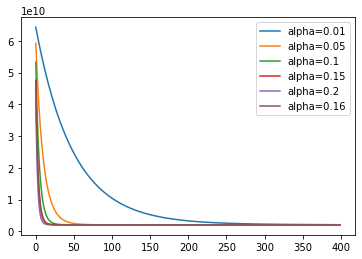

In [94]:
plt.plot(range(0,iterations), costs_alpha[0][1],label='alpha='+str(costs_alpha[0][0]))
plt.plot(range(0,iterations), costs_alpha[1][1],label='alpha='+str(costs_alpha[1][0]))
plt.plot(range(0,iterations), costs_alpha[2][1],label='alpha='+str(costs_alpha[2][0]))
plt.plot(range(0,iterations), costs_alpha[3][1],label='alpha='+str(costs_alpha[3][0]))
plt.plot(range(0,iterations), costs_alpha[4][1],label='alpha='+str(costs_alpha[4][0]))
plt.plot(range(0,iterations), costs_alpha[5][1],label='alpha='+str(costs_alpha[5][0]))
plt.legend()
plt.show()

In [95]:
alpha = 0.01
theta,costs = gradient_descent (X_norm, initial_theta, Y, alpha, iterations)

min costs is 2105448288.6292472


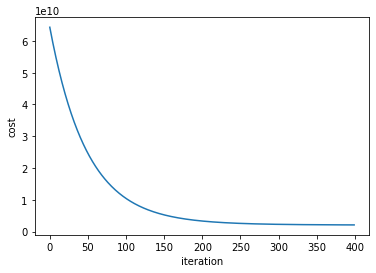

In [96]:
plt.plot ( range(0,iterations) ,costs)
plt.xlabel ('iteration')
plt.ylabel ('cost')
print (f'min costs is {min (costs)}')

In [97]:
def predict (theta,x):
    y_hat = x @ theta
    return y_hat

In [98]:
def test_data_normalize (test_X, X, add_1=1):
    """
    Normalizes trial test_data according to the 
    mean and std of the training dataset
    """
    mean = np.mean (X, axis=1).reshape (2,1)
    std = np.std (X, axis=1).reshape (2,1)
    test_X_norm = (test_X - mean) / std
    test_X_norm = test_X_norm.transpose()
    if add_1 == 1 :
        one = np.ones( (test_X_norm.shape[0],1) )
        X_norm = np.concatenate([one,test_X_norm],axis = 1)
    return X_norm

In [100]:
test_X = [[1600,1800,2000,2200],[3,3,3,3]]
test_X_norm = test_data_normalize(test_X, X)
print (test_X_norm)
predict (theta,test_X_norm)

[[ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00 -2.55253349e-01 -2.26093368e-01]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00  2.53521350e-01 -2.26093368e-01]]


array([[282899.29359696],
       [308188.30869399],
       [333477.32379102],
       [358766.33888805]])